In [2]:
#Paso 1: En Readme.md


In [3]:
#Paso 2: Obtencion y carga del conjunto de datos

In [2]:
import sqlite3
import pandas as pd

df = pd.read_csv('/workspaces/Fases-del-sue-o/data/mental_health_data final data.csv')
print(df.head())



   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes      NaN                  Yes          Low   
1                      No      Low                   No          Low   
2                      No      NaN                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes      NaN                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                  

In [5]:
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mental_health.db')

# Almacenar los datos en la base de datos SQLite en una tabla llamada 'health_data'
df.to_sql('health_data', conn, if_exists='replace', index=False)
print("Datos cargados correctamente en la base de datos SQLite.")


Datos cargados correctamente en la base de datos SQLite.


In [6]:
#Paso 3: Almacenar la información

In [7]:
#Ver 5 primeras filas
query = "SELECT * FROM health_data LIMIT 5"
df_from_db = pd.read_sql(query, conn)
print(df_from_db)


   User_ID  Age             Gender   Occupation    Country  \
0        1   36               Male    Education  Australia   
1        2   48               Male  Engineering      Other   
2        3   18  Prefer not to say        Sales      India   
3        4   30         Non-binary  Engineering  Australia   
4        5   58               Male           IT        USA   

  Mental_Health_Condition Severity Consultation_History Stress_Level  \
0                     Yes     None                  Yes          Low   
1                      No      Low                   No          Low   
2                      No     None                  Yes       Medium   
3                      No   Medium                   No          Low   
4                     Yes     None                  Yes         High   

   Sleep_Hours  Work_Hours  Physical_Activity_Hours  Social_Media_Usage  \
0          7.6          46                        8                 2.2   
1          6.8          74                  

In [8]:
#Cuantas personas tienen alguna condicion mental
query = "SELECT Mental_Health_Condition, COUNT(*) FROM health_data GROUP BY Mental_Health_Condition"
df_mental_health_count = pd.read_sql(query, conn)
print(df_mental_health_count)


  Mental_Health_Condition  COUNT(*)
0                      No     25003
1                     Yes     24997


In [9]:
#Horas de sueño por nivel de estrés
query = "SELECT Stress_Level, AVG(Sleep_Hours) FROM health_data GROUP BY Stress_Level"
df_sleep_by_stress = pd.read_sql(query, conn)
print(df_sleep_by_stress)


  Stress_Level  AVG(Sleep_Hours)
0         High          7.040672
1          Low          6.994017
2       Medium          6.994990


In [10]:
#Ocupaciones de personas con condicion de salud mental
query = """
SELECT Occupation, Mental_Health_Condition, COUNT(*)
FROM health_data
GROUP BY Occupation, Mental_Health_Condition
"""
df_occupation_mental_health = pd.read_sql(query, conn)
print(df_occupation_mental_health)


     Occupation Mental_Health_Condition  COUNT(*)
0     Education                      No      3459
1     Education                     Yes      3630
2   Engineering                      No      3542
3   Engineering                     Yes      3530
4       Finance                      No      3593
5       Finance                     Yes      3693
6    Healthcare                      No      3550
7    Healthcare                     Yes      3555
8            IT                      No      3667
9            IT                     Yes      3614
10        Other                      No      3624
11        Other                     Yes      3488
12        Sales                      No      3568
13        Sales                     Yes      3487


In [11]:
df.columns = [
    'ID_Usuario', 'Edad', 'Género', 'Ocupación', 'País', 'Condición_Salud_Mental', 
    'Severidad', 'Historial_Consulta', 'Nivel_Estrés', 'Horas_Sueño', 'Horas_Trabajo', 
    'Horas_Actividad_Física', 'Uso_Redes_Sociales', 'Calidad_Dieta', 'Hábito_Fumar', 
    'Consumo_Alcohol', 'Uso_Medicación'
]

print(df.head())


   ID_Usuario  Edad             Género    Ocupación       País  \
0           1    36               Male    Education  Australia   
1           2    48               Male  Engineering      Other   
2           3    18  Prefer not to say        Sales      India   
3           4    30         Non-binary  Engineering  Australia   
4           5    58               Male           IT        USA   

  Condición_Salud_Mental Severidad Historial_Consulta Nivel_Estrés  \
0                    Yes       NaN                Yes          Low   
1                     No       Low                 No          Low   
2                     No       NaN                Yes       Medium   
3                     No    Medium                 No          Low   
4                    Yes       NaN                Yes         High   

   Horas_Sueño  Horas_Trabajo  Horas_Actividad_Física  Uso_Redes_Sociales  \
0          7.6             46                       8                 2.2   
1          6.8             7

In [12]:
#No aporta nada ID_Usuario
df = df.drop(columns=['ID_Usuario'])

In [13]:
#PASO 4 ANALISIS DESCRIPTIVO
df.describe()




,Edad,Horas_Sueño,Horas_Trabajo,Horas_Actividad_Física,Uso_Redes_Sociales
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.473080,7.009934,55.062860,4.982040,3.243160
std,13.844185,1.732674,14.691575,3.161759,1.585235
min,18.000000,4.000000,30.000000,0.000000,0.500000
25%,29.000000,5.500000,42.000000,2.000000,1.900000
50%,41.000000,7.000000,55.000000,5.000000,3.200000
75%,53.000000,8.500000,68.000000,8.000000,4.600000
max,65.000000,10.000000,80.000000,10.000000,6.000000


In [14]:
df.describe(include=['object'])

,Género,Ocupación,País,Condición_Salud_Mental,Severidad,Historial_Consulta,Nivel_Estrés,Calidad_Dieta,Hábito_Fumar,Consumo_Alcohol,Uso_Medicación
count,50000,50000,50000,50000,24998,50000,50000,50000,50000,50000,50000
unique,4,7,7,2,3,2,3,3,4,4,2
top,Female,Finance,India,No,Medium,No,Medium,Unhealthy,Non-Smoker,Regular Drinker,No
freq,12633,7286,7323,25003,8436,25110,16847,16729,12580,12531,25174


In [15]:
numerical_desc = df.describe()

print("Estadísticas Descriptivas (Numericas):\n", numerical_desc)



Estadísticas Descriptivas (Numericas):
                Edad   Horas_Sueño  Horas_Trabajo  Horas_Actividad_Física  \
count  50000.000000  50000.000000   50000.000000            50000.000000   
mean      41.473080      7.009934      55.062860                4.982040   
std       13.844185      1.732674      14.691575                3.161759   
min       18.000000      4.000000      30.000000                0.000000   
25%       29.000000      5.500000      42.000000                2.000000   
50%       41.000000      7.000000      55.000000                5.000000   
75%       53.000000      8.500000      68.000000                8.000000   
max       65.000000     10.000000      80.000000               10.000000   

       Uso_Redes_Sociales  
count        50000.000000  
mean             3.243160  
std              1.585235  
min              0.500000  
25%              1.900000  
50%              3.200000  
75%              4.600000  
max              6.000000  


In [16]:
categorical_desc = df.describe(include=['object'])
print("\nEstadísticas Descriptivas (Categóricas):\n", categorical_desc)


Estadísticas Descriptivas (Categóricas):
         Género Ocupación   País Condición_Salud_Mental Severidad  \
count    50000     50000  50000                  50000     24998   
unique       4         7      7                      2         3   
top     Female   Finance  India                     No    Medium   
freq     12633      7286   7323                  25003      8436   

       Historial_Consulta Nivel_Estrés Calidad_Dieta Hábito_Fumar  \
count               50000        50000         50000        50000   
unique                  2            3             3            4   
top                    No       Medium     Unhealthy   Non-Smoker   
freq                25110        16847         16729        12580   

        Consumo_Alcohol Uso_Medicación  
count             50000          50000  
unique                4              2  
top     Regular Drinker             No  
freq              12531          25174  


In [17]:
df.isnull().sum()

Edad                          0
Género                        0
Ocupación                     0
País                          0
Condición_Salud_Mental        0
Severidad                 25002
Historial_Consulta            0
Nivel_Estrés                  0
Horas_Sueño                   0
Horas_Trabajo                 0
Horas_Actividad_Física        0
Uso_Redes_Sociales            0
Calidad_Dieta                 0
Hábito_Fumar                  0
Consumo_Alcohol               0
Uso_Medicación                0
dtype: int64

In [18]:
#Edad muestra una distribución bastante equilibrada entre jóvenes y adultos mayores, lo cual es interesante para el análisis de cómo la salud mental puede cambiar con la edad.
#Horas de Sueño tienen una media razonable, pero es importante ver si existe alguna relación entre las horas de sueño y otros factores, como el estrés o la condición de salud mental.
#Horas de Trabajo es una variable interesante que puede tener un impacto en la salud mental. Se observa que hay una gran variabilidad, lo que puede indicar diferentes tipos de ocupaciones o jornadas laborales en el dataset.
#Actividad Física parece ser bastante moderada, aunque algunos participantes realizan mucho más ejercicio que otros. La actividad física puede tener un impacto positivo en la salud mental, por lo que es relevante explorar esta variable más a fondo.
#Uso de Redes Sociales parece estar dentro de un rango común, aunque algunas personas pasan bastante tiempo en ellas. Dado que el uso excesivo de redes sociales está relacionado con trastornos de salud mental, es interesante estudiar esta variable en detalle.

In [19]:
#PASO 5 EDA

In [20]:
df.head()

,Edad,Género,Ocupación,País,Condición_Salud_Mental,Severidad,Historial_Consulta,Nivel_Estrés,Horas_Sueño,Horas_Trabajo,Horas_Actividad_Física,Uso_Redes_Sociales,Calidad_Dieta,Hábito_Fumar,Consumo_Alcohol,Uso_Medicación
0,36,Male,Education,Australia,Yes,NaN,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes
1,48,Male,Engineering,Other,No,Low,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No
2,18,Prefer not to say,Sales,India,No,NaN,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No
3,30,Non-binary,Engineering,Australia,No,Medium,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No
4,58,Male,IT,USA,Yes,NaN,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    50000 non-null  int64  
 1   Género                  50000 non-null  object 
 2   Ocupación               50000 non-null  object 
 3   País                    50000 non-null  object 
 4   Condición_Salud_Mental  50000 non-null  object 
 5   Severidad               24998 non-null  object 
 6   Historial_Consulta      50000 non-null  object 
 7   Nivel_Estrés            50000 non-null  object 
 8   Horas_Sueño             50000 non-null  float64
 9   Horas_Trabajo           50000 non-null  int64  
 10  Horas_Actividad_Física  50000 non-null  int64  
 11  Uso_Redes_Sociales      50000 non-null  float64
 12  Calidad_Dieta           50000 non-null  object 
 13  Hábito_Fumar            50000 non-null  object 
 14  Consumo_Alcohol         50000 non-null

In [22]:
#La columna Severidad tiene muchos nulos
df=df.drop(columns=['Severidad'])


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Edad                    50000 non-null  int64  
 1   Género                  50000 non-null  object 
 2   Ocupación               50000 non-null  object 
 3   País                    50000 non-null  object 
 4   Condición_Salud_Mental  50000 non-null  object 
 5   Historial_Consulta      50000 non-null  object 
 6   Nivel_Estrés            50000 non-null  object 
 7   Horas_Sueño             50000 non-null  float64
 8   Horas_Trabajo           50000 non-null  int64  
 9   Horas_Actividad_Física  50000 non-null  int64  
 10  Uso_Redes_Sociales      50000 non-null  float64
 11  Calidad_Dieta           50000 non-null  object 
 12  Hábito_Fumar            50000 non-null  object 
 13  Consumo_Alcohol         50000 non-null  object 
 14  Uso_Medicación          50000 non-null

In [24]:
#Revisar subniveles (opciones a elegir por columna) de las columnas 
columnas_categoricas=['Género','Ocupación','País','Condición_Salud_Mental','Historial_Consulta','Nivel_Estrés','Calidad_Dieta','Hábito_Fumar','Consumo_Alcohol','Uso_Medicación']

for col in columnas_categoricas:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Género: 4 subniveles
Columna Ocupación: 7 subniveles
Columna País: 7 subniveles
Columna Condición_Salud_Mental: 2 subniveles
Columna Historial_Consulta: 2 subniveles
Columna Nivel_Estrés: 3 subniveles
Columna Calidad_Dieta: 3 subniveles
Columna Hábito_Fumar: 4 subniveles
Columna Consumo_Alcohol: 4 subniveles
Columna Uso_Medicación: 2 subniveles


In [25]:
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

for col in columnas_numericas:
        print(f'Columna {col}: {df[col].nunique()} subniveles')


Columna Edad: 48 subniveles
Columna Horas_Sueño: 61 subniveles
Columna Horas_Trabajo: 51 subniveles
Columna Horas_Actividad_Física: 11 subniveles
Columna Uso_Redes_Sociales: 56 subniveles


In [26]:
df.shape

(50000, 15)

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(50000, 15)

/tmp/ipykernel_2318/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_2318/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_2318/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
/tmp/ipykernel_2318/1869771987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hu

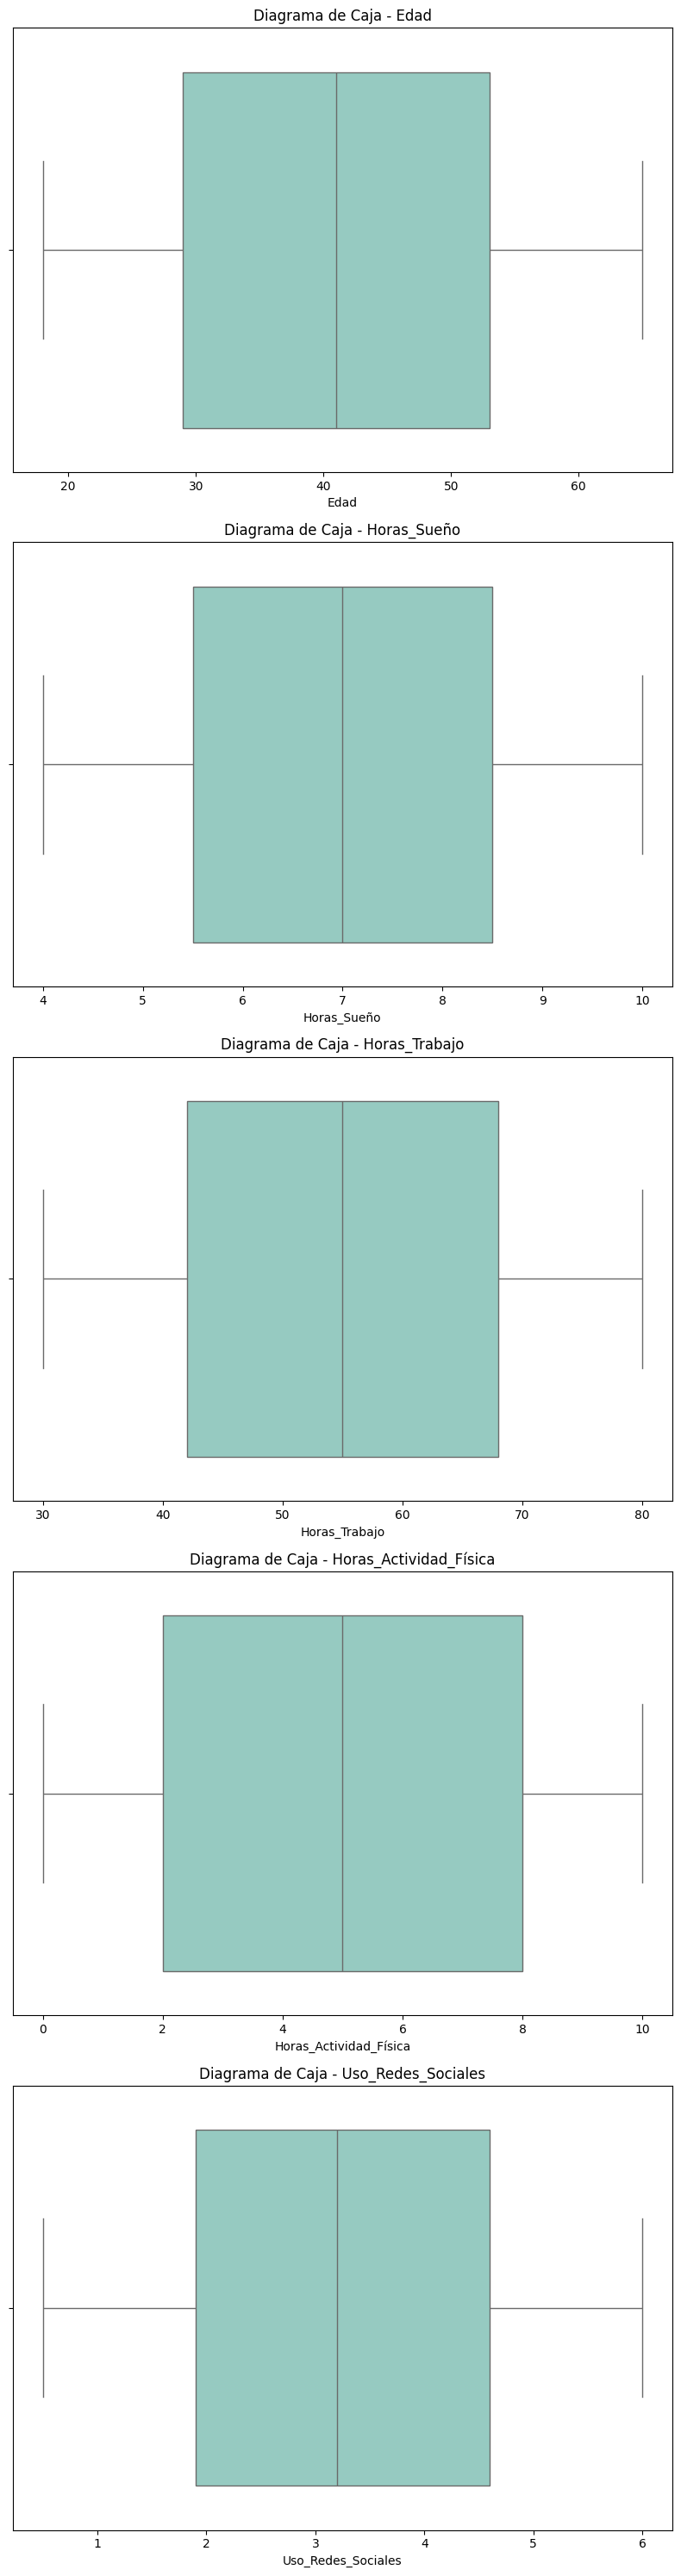

In [29]:
#Diagrama de Caja
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax=plt.subplots(nrows=5,ncols=1,figsize=(8,30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=df, ax=ax[i], palette='Set3')
    ax[i].set_title(f'Diagrama de Caja - {col}', fontsize=12)


plt.tight_layout()
plt.show()



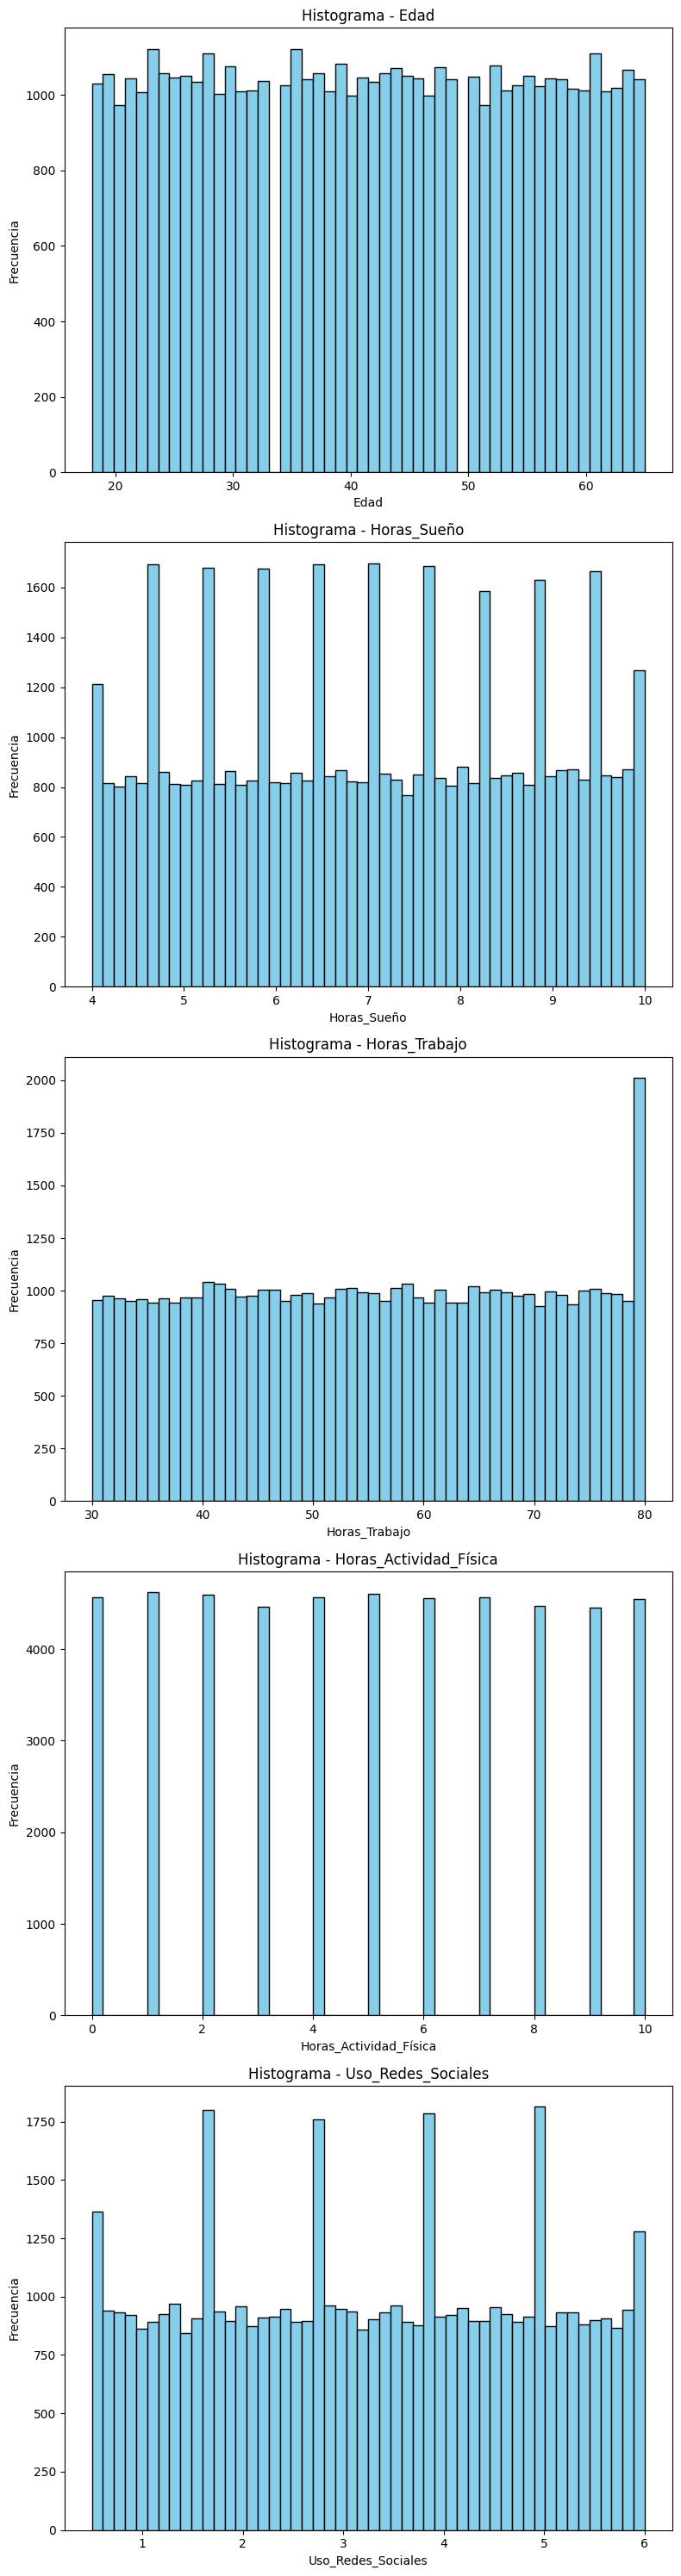

In [30]:
#Histograma
import matplotlib.pyplot as plt

columnas_numericas = ['Edad', 'Horas_Sueño', 'Horas_Trabajo', 'Horas_Actividad_Física', 'Uso_Redes_Sociales']

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    ax[i].hist(df[col], bins=50, color='skyblue', edgecolor='black')
    ax[i].set_title(f'Histograma - {col}', fontsize=12)
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


/tmp/ipykernel_2318/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_2318/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_2318/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_2318/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)
/tmp/ipykernel_2318/2749100429.py:6: UserWarning: set_ticklabels() should only be used with a fi

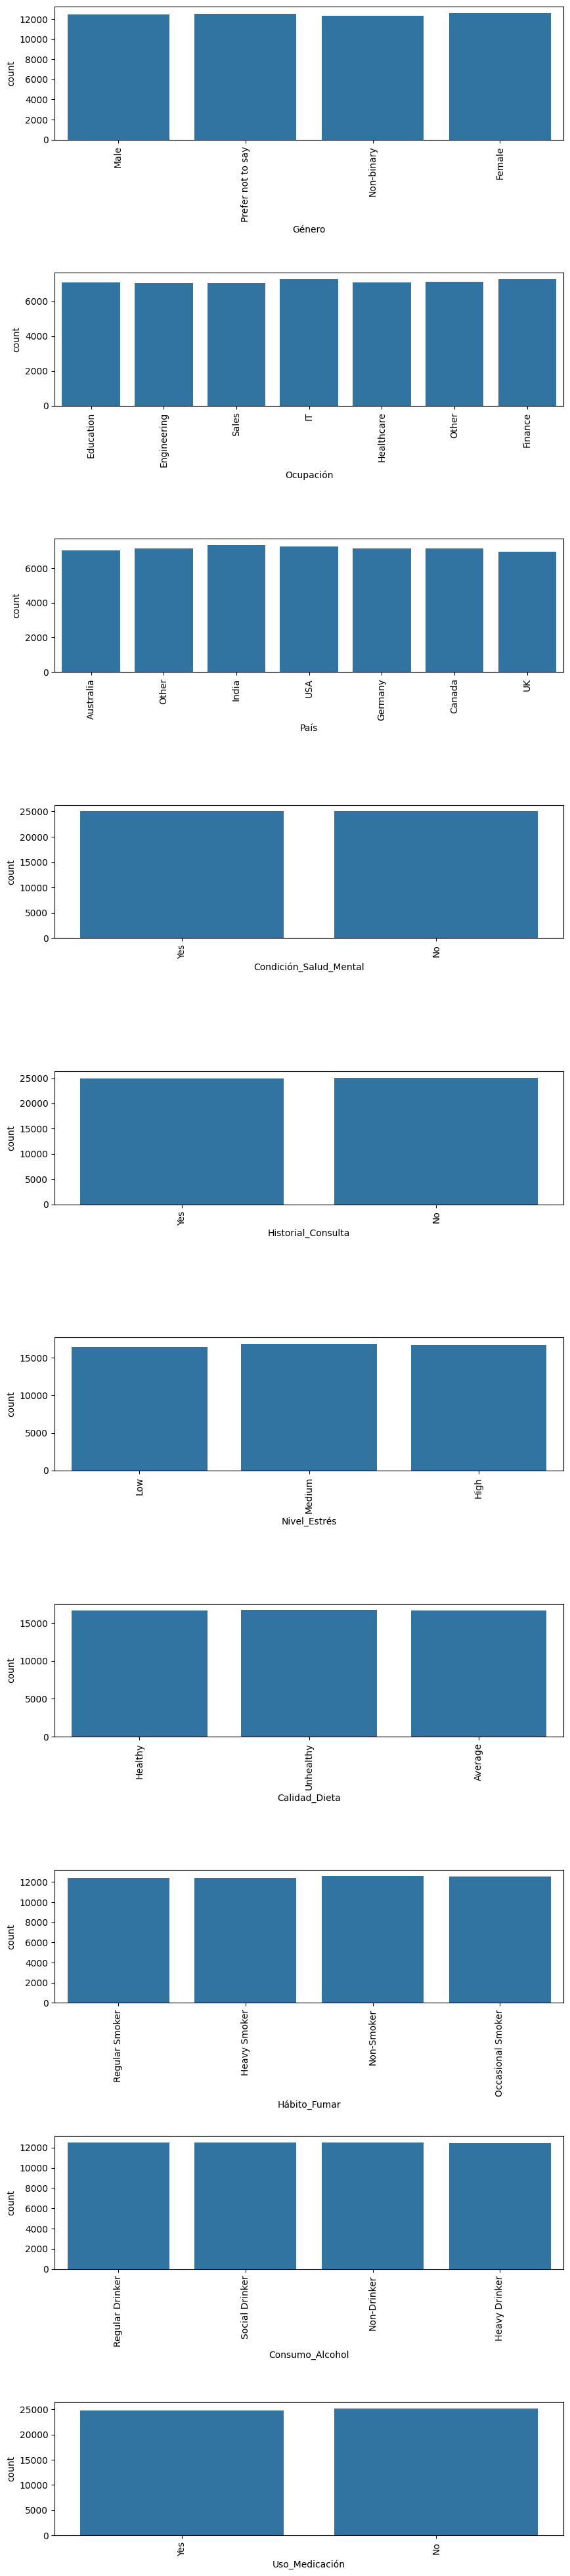

In [31]:
#Gráfico de barras
fig,ax=plt.subplots(nrows=10,ncols=1,figsize=(10,50))
fig.subplots_adjust(hspace=1)
for i, col in enumerate(columnas_categoricas):
    sns.countplot(x=col,data=df,ax=ax[i])
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=90)

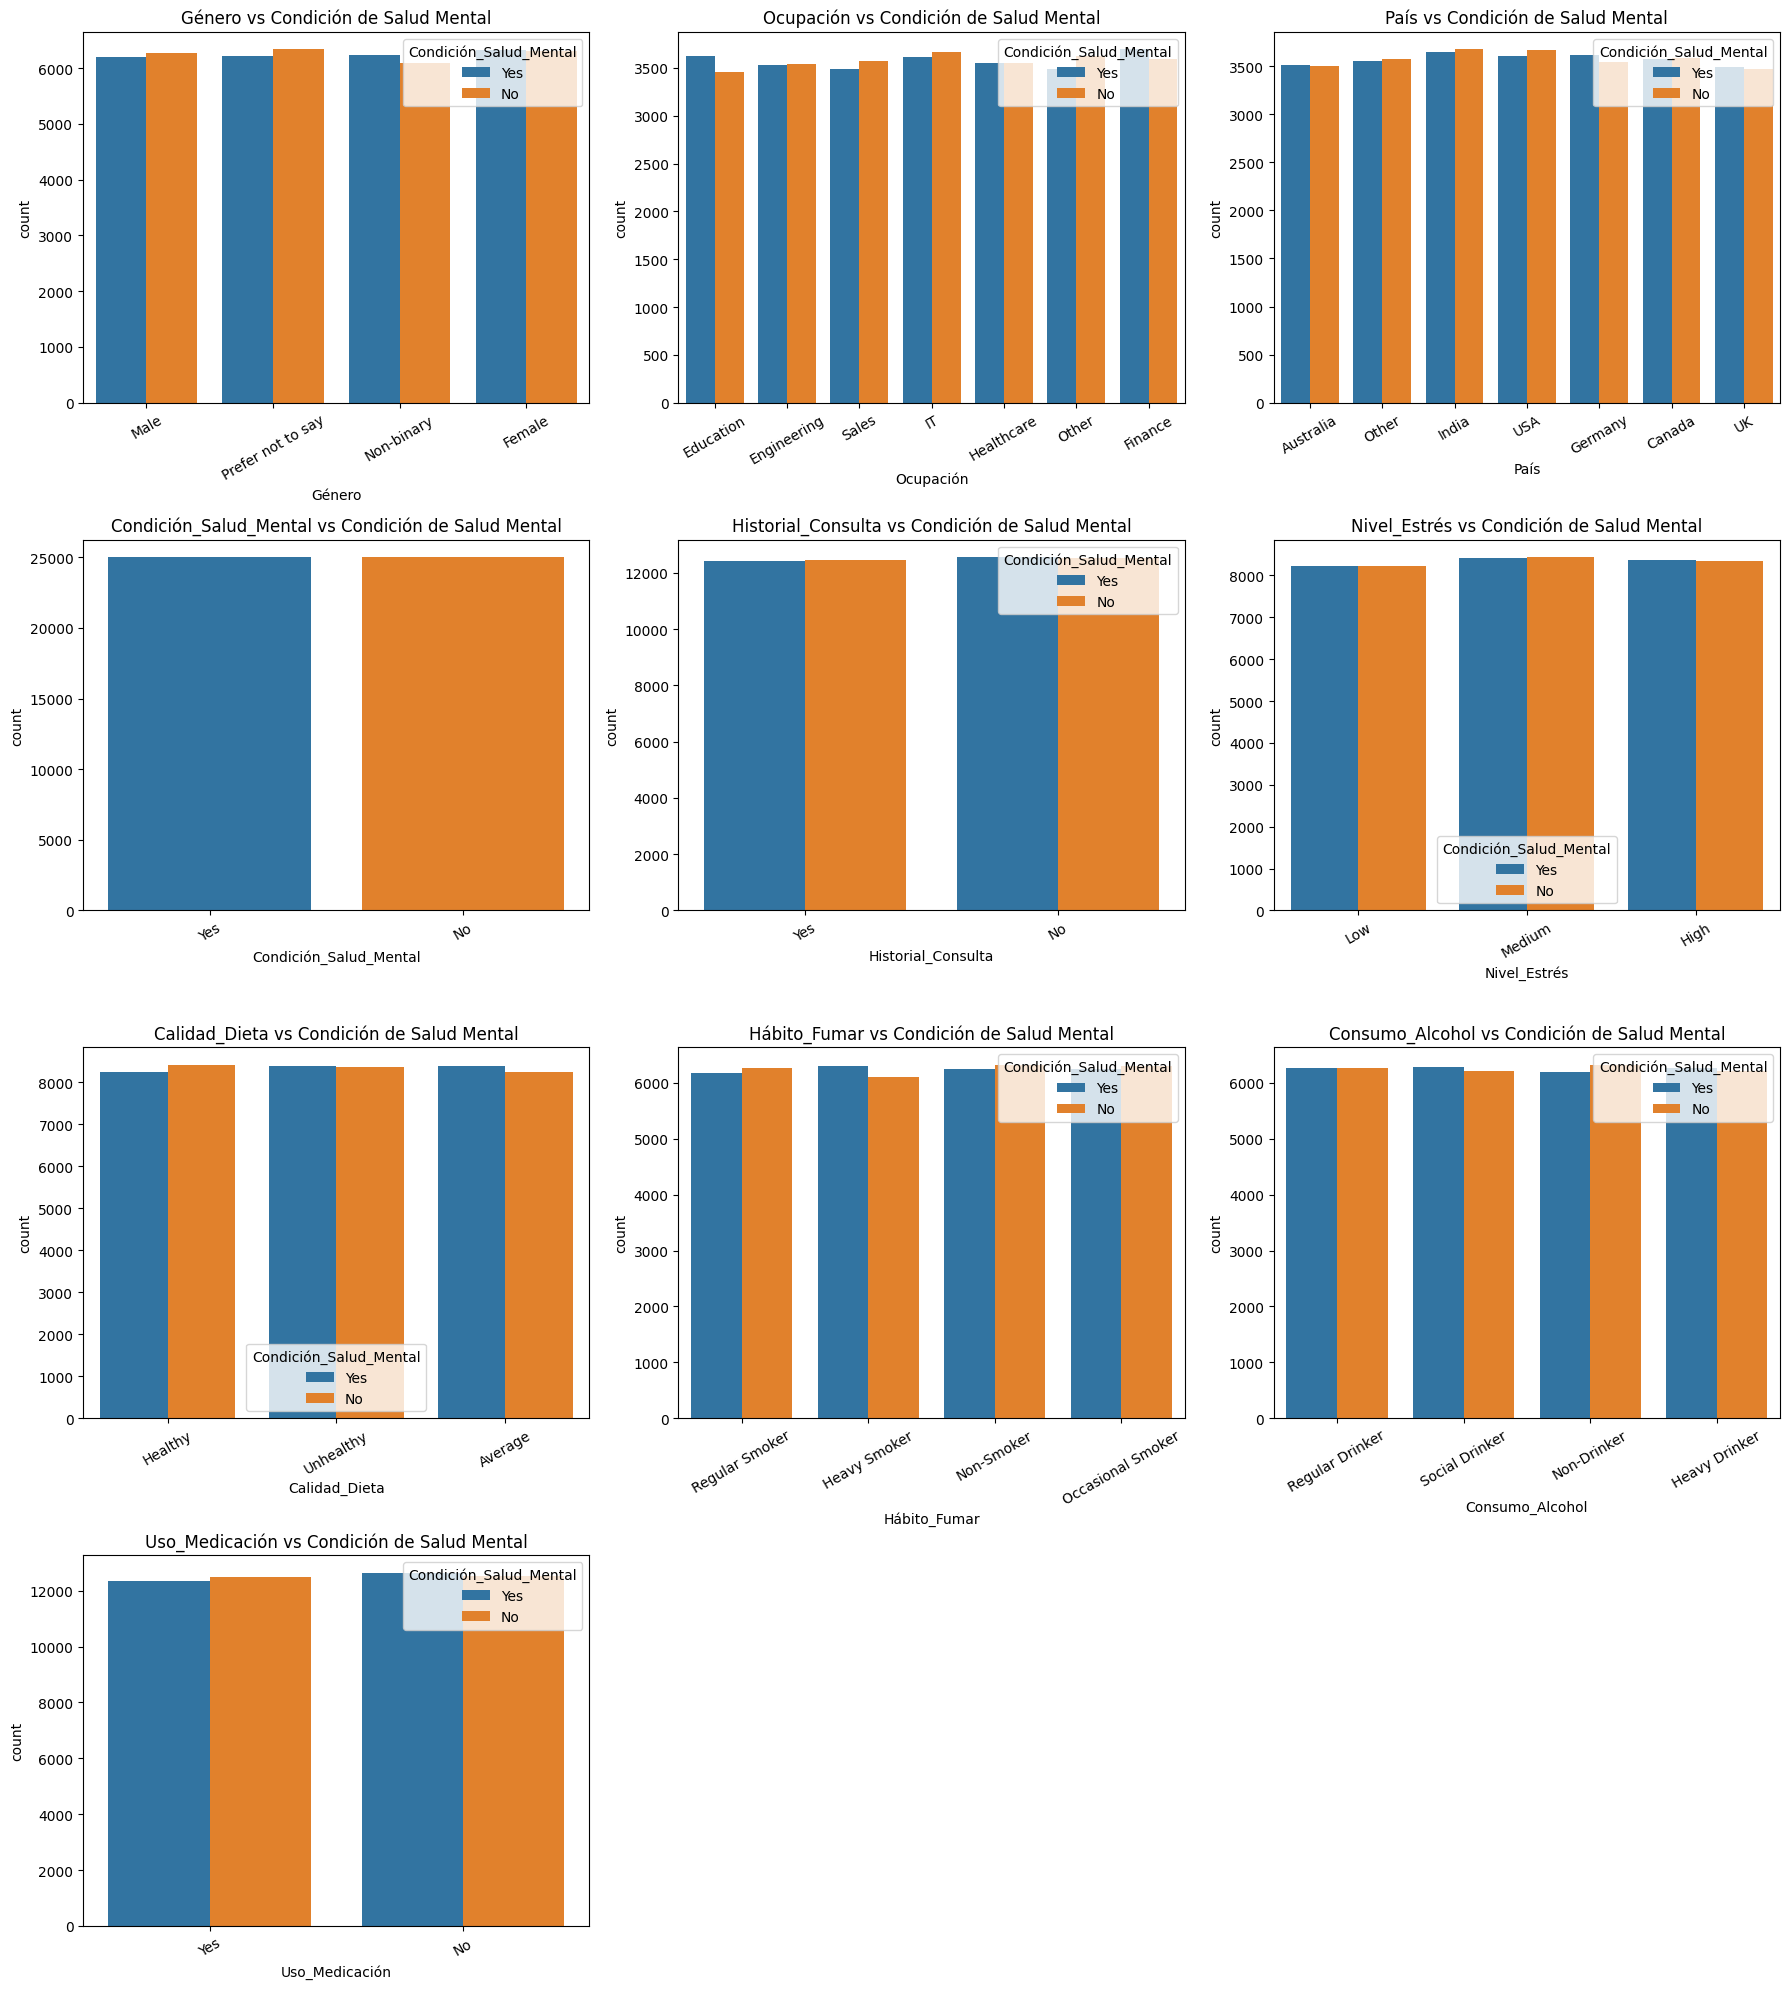

In [32]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables Categoricas
n_cols = 3
n_rows = (len(columnas_categoricas) + n_cols - 1) // n_cols  # redondea hacia arriba

fig, axis = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))

# Aplanar la matriz de ejes para indexarlos fácilmente
axis = axis.flatten()

# Crear los gráficos
for i, col in enumerate(columnas_categoricas):
    sns.countplot(ax=axis[i], data=df, x=col, hue='Condición_Salud_Mental')
    axis[i].set_title(f'{col} vs Condición de Salud Mental')
    axis[i].tick_params(axis='x', rotation=30)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()

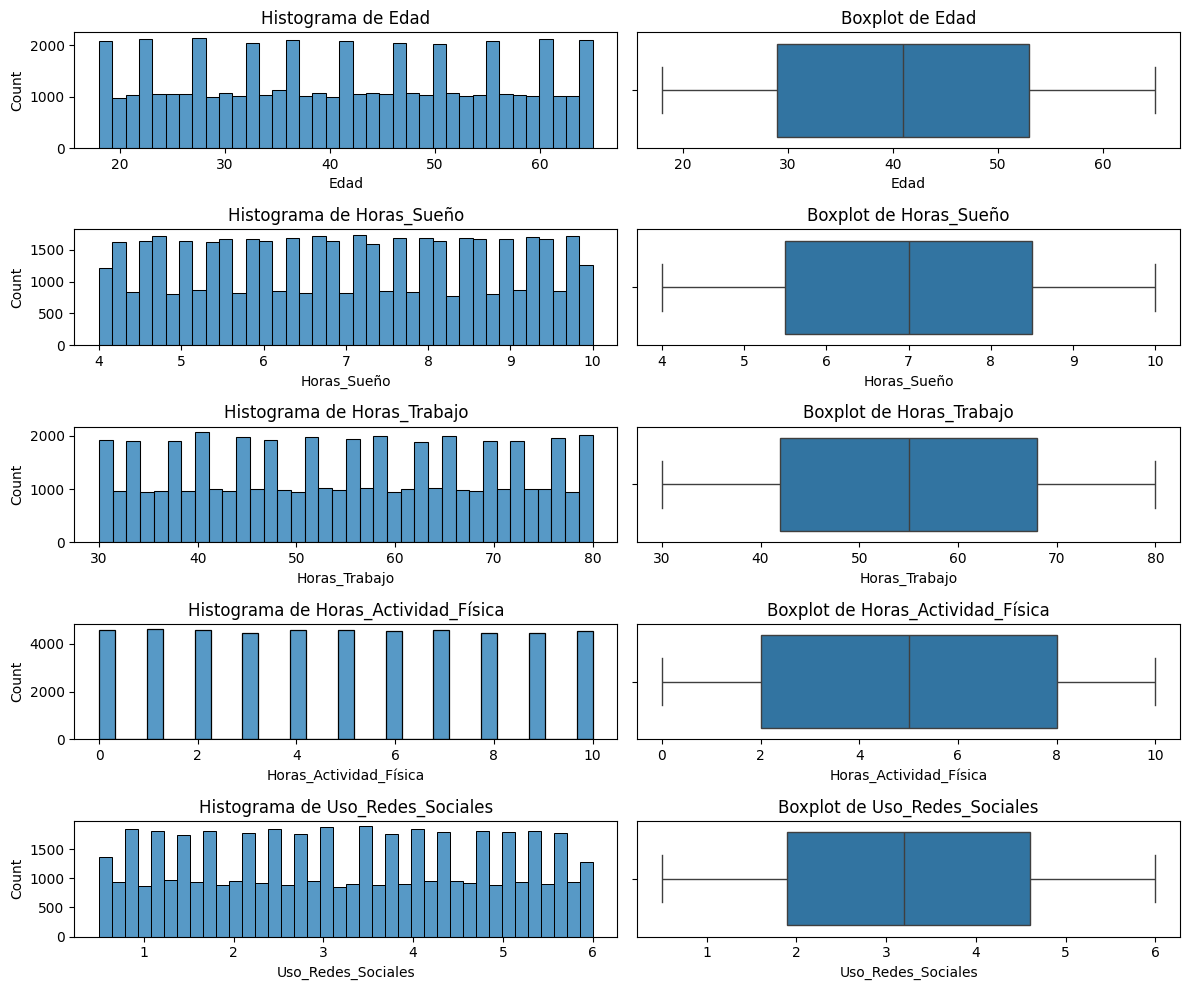

In [33]:
#ANALISIS VARIABLE UNIVARIANTE
#Variables númericas
fig, axis = plt.subplots(5, 2, figsize=(12, 10), gridspec_kw={'height_ratios': [6, 6, 6, 6, 6]})

for i, var in enumerate(columnas_numericas):
    sns.histplot(ax=axis[i, 0], data=df, x=var)
    sns.boxplot(ax=axis[i, 1], data=df, x=var, orient='h')
    axis[i, 0].set_title(f'Histograma de {var}')
    axis[i, 1].set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()



In [34]:
df.describe()

,Edad,Horas_Sueño,Horas_Trabajo,Horas_Actividad_Física,Uso_Redes_Sociales
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.473080,7.009934,55.062860,4.982040,3.243160
std,13.844185,1.732674,14.691575,3.161759,1.585235
min,18.000000,4.000000,30.000000,0.000000,0.500000
25%,29.000000,5.500000,42.000000,2.000000,1.900000
50%,41.000000,7.000000,55.000000,5.000000,3.200000
75%,53.000000,8.500000,68.000000,8.000000,4.600000
max,65.000000,10.000000,80.000000,10.000000,6.000000


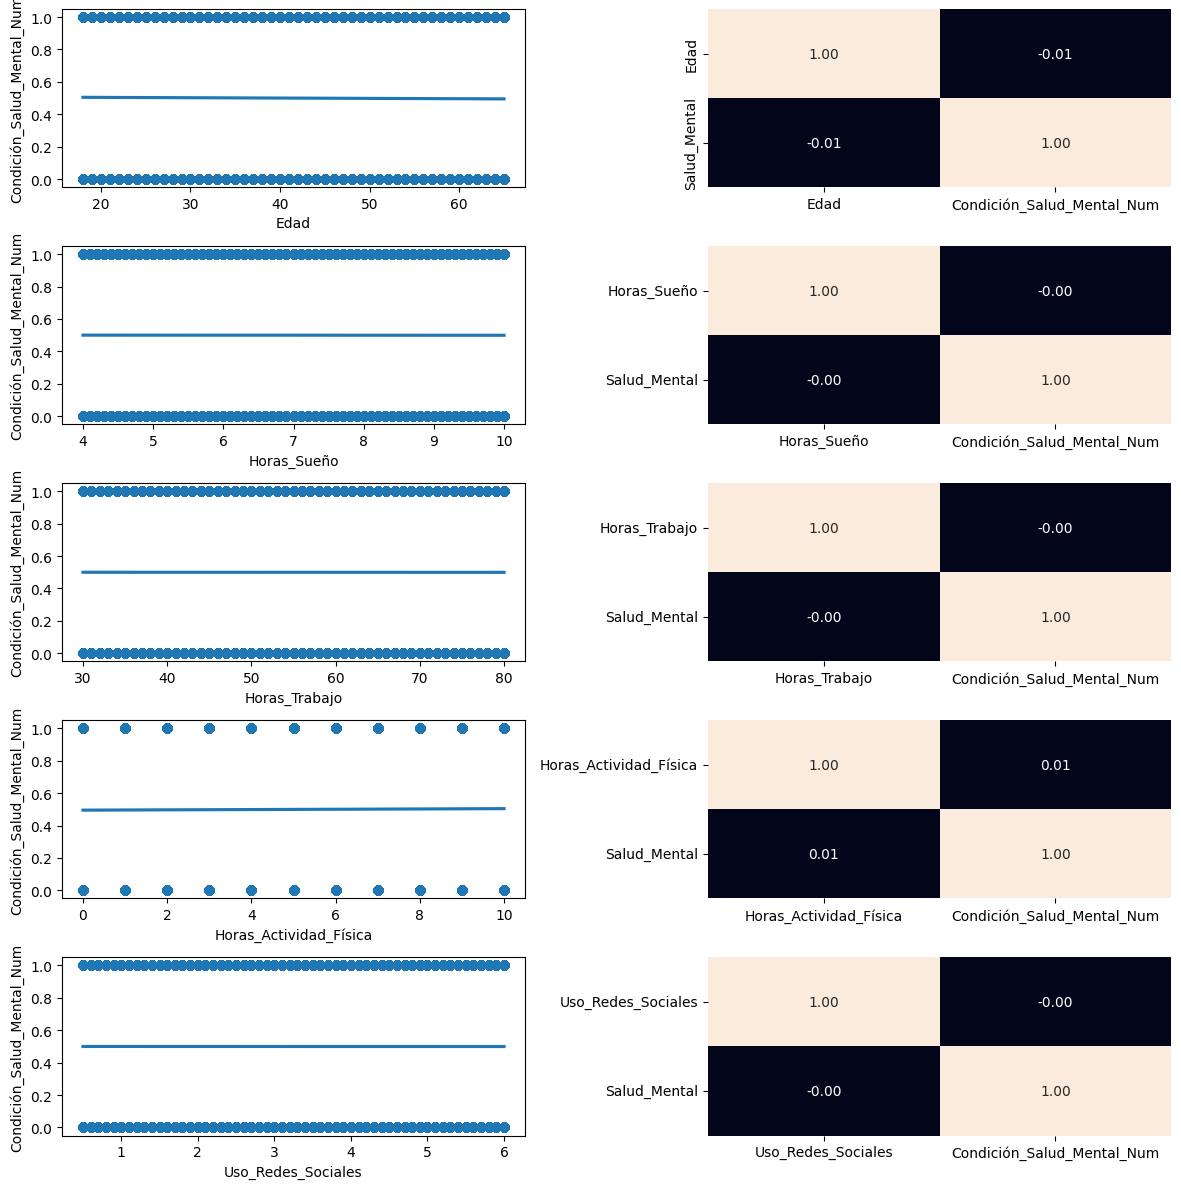

In [35]:
#ANALISIS VARIABLE MULTIVARIANTE
#NÚMERICO - NÚMERICO
df['Condición_Salud_Mental_Num'] = df['Condición_Salud_Mental'].map({'Yes': 1, 'No': 0})

fig, axis = plt.subplots(5, 2, figsize=(12, 12))

for i, col in enumerate(columnas_numericas):
    sns.regplot(ax=axis[i, 0], data=df, x=col, y='Condición_Salud_Mental_Num')
    sns.heatmap(df[[col, 'Condición_Salud_Mental_Num']].corr(), annot=True, fmt='.2f',
                ax=axis[i, 1], cbar=False, yticklabels=[col, 'Salud_Mental'])

plt.tight_layout()
plt.show()

In [36]:
#5 variables 
#Débil o Nula Correlación Lineal: En general, los mapas de calor muestran correlaciones lineales muy débiles (cercanas a cero) entre cada una de las variables numéricas analizadas (Edad, Horas Sueño, Horas Trabajo, Horas Activida Fisica, Uso Redes Sociales) y la variable de condición de salud mental.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

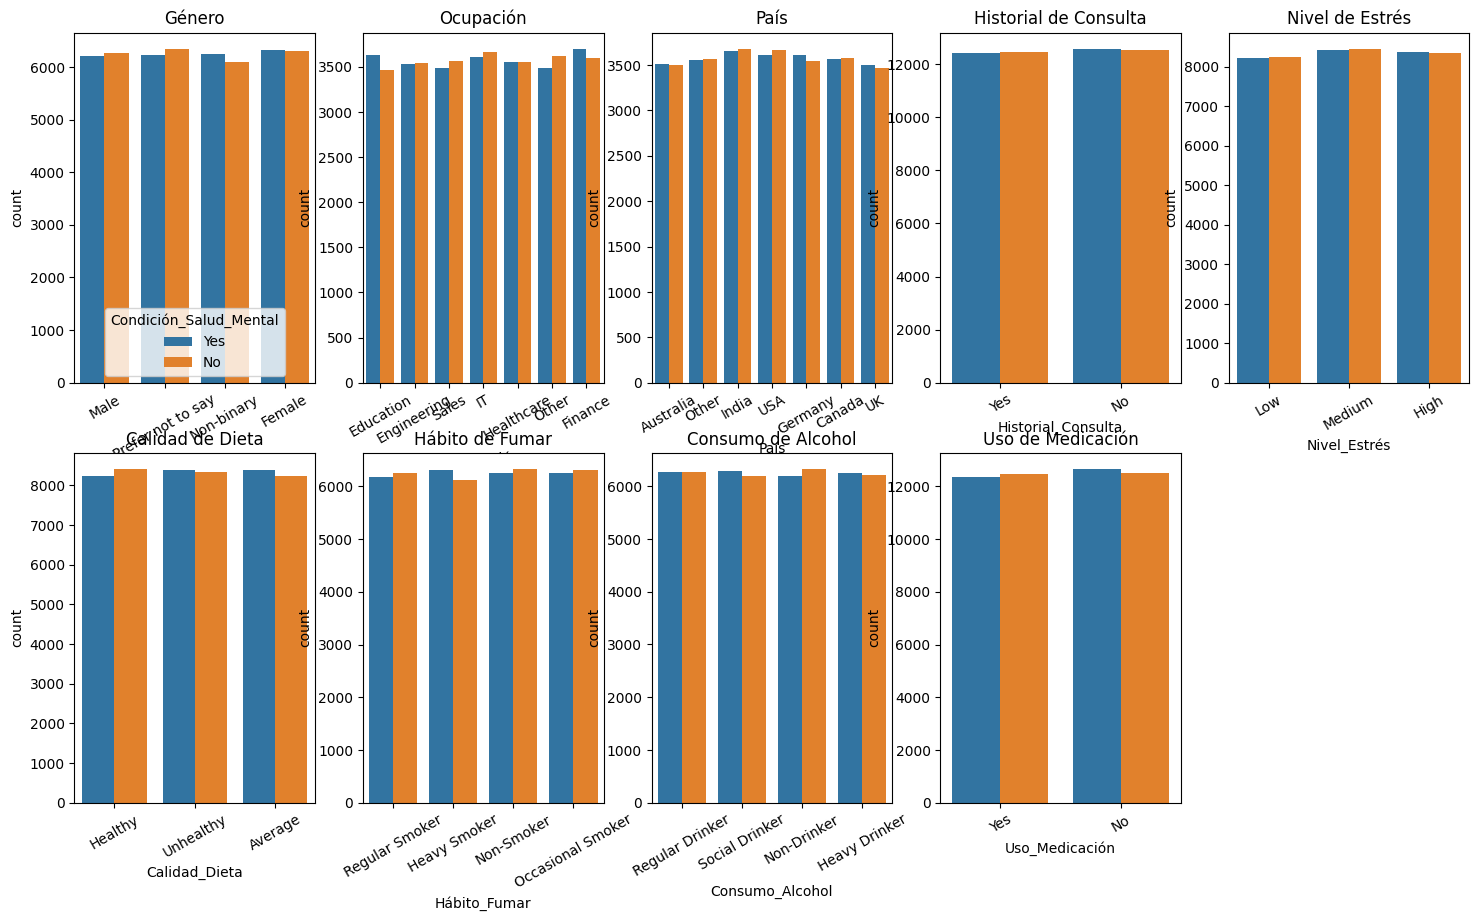

In [37]:
#ANALISIS VARIABLE MULTIVARIANTE
#Análisis categorico - categorico

fig, axis = plt.subplots(2, 5, figsize=(18, 10))  

sns.countplot(ax=axis[0, 0], data=df, x='Género', hue='Condición_Salud_Mental', legend=True)
axis[0, 0].set_title('Género')
axis[0, 0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 1], data=df, x='Ocupación', hue='Condición_Salud_Mental', legend=False)
axis[0, 1].set_title('Ocupación')
axis[0, 1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 2], data=df, x='País', hue='Condición_Salud_Mental', legend=False)
axis[0, 2].set_title('País')
axis[0, 2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 3], data=df, x='Historial_Consulta', hue='Condición_Salud_Mental', legend=False)
axis[0, 3].set_title('Historial de Consulta')
axis[0, 3].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[0, 4], data=df, x='Nivel_Estrés', hue='Condición_Salud_Mental', legend=False)
axis[0, 4].set_title('Nivel de Estrés')
axis[0, 4].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 0], data=df, x='Calidad_Dieta', hue='Condición_Salud_Mental', legend=False)
axis[1, 0].set_title('Calidad de Dieta')
axis[1, 0].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 1], data=df, x='Hábito_Fumar', hue='Condición_Salud_Mental', legend=False)
axis[1, 1].set_title('Hábito de Fumar')
axis[1, 1].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 2], data=df, x='Consumo_Alcohol', hue='Condición_Salud_Mental', legend=False)
axis[1, 2].set_title('Consumo de Alcohol')
axis[1, 2].tick_params(axis='x', rotation=30)

sns.countplot(ax=axis[1, 3], data=df, x='Uso_Medicación', hue='Condición_Salud_Mental', legend=False)
axis[1, 3].set_title('Uso de Medicación')
axis[1, 3].tick_params(axis='x', rotation=30)

# Eliminar gráfica vacía
fig.delaxes(axis[1, 4])


plt.tight_layout


In [38]:
df.head()

,Edad,Género,Ocupación,País,Condición_Salud_Mental,Historial_Consulta,Nivel_Estrés,Horas_Sueño,Horas_Trabajo,Horas_Actividad_Física,Uso_Redes_Sociales,Calidad_Dieta,Hábito_Fumar,Consumo_Alcohol,Uso_Medicación,Condición_Salud_Mental_Num
0,36,Male,Education,Australia,Yes,Yes,Low,7.6,46,8,2.2,Healthy,Regular Smoker,Regular Drinker,Yes,1
1,48,Male,Engineering,Other,No,No,Low,6.8,74,2,3.4,Unhealthy,Heavy Smoker,Social Drinker,No,0
2,18,Prefer not to say,Sales,India,No,Yes,Medium,7.1,77,9,5.9,Healthy,Heavy Smoker,Social Drinker,No,0
3,30,Non-binary,Engineering,Australia,No,No,Low,6.9,57,4,5.4,Average,Regular Smoker,Regular Drinker,No,0
4,58,Male,IT,USA,Yes,Yes,High,4.7,45,10,3.3,Unhealthy,Regular Smoker,Non-Drinker,Yes,1


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

num_variables = ['Género','Ocupación','País','Historial_Consulta','Nivel_Estrés','Calidad_Dieta','Hábito_Fumar','Consumo_Alcohol','Uso_Medicación', 'Edad', 'Horas_Sueño', 'Horas_Trabajo', 'Horas_Actividad_Física', 'Uso_Redes_Sociales']

for var in num_variables:
    if var not in df.columns:
        print(f"Error: La columna '{var}' no existe en el DataFrame.")
        exit() 

X = df[num_variables]
y = df['Condición_Salud_Mental']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head()) 


Error: La columna 'Género' no existe en el DataFrame.
Error: La columna 'Ocupación' no existe en el DataFrame.
Error: La columna 'País' no existe en el DataFrame.
Error: La columna 'Historial_Consulta' no existe en el DataFrame.
Error: La columna 'Nivel_Estrés' no existe en el DataFrame.
Error: La columna 'Calidad_Dieta' no existe en el DataFrame.
Error: La columna 'Hábito_Fumar' no existe en el DataFrame.
Error: La columna 'Consumo_Alcohol' no existe en el DataFrame.
Error: La columna 'Uso_Medicación' no existe en el DataFrame.
Error: La columna 'Edad' no existe en el DataFrame.
Error: La columna 'Horas_Sueño' no existe en el DataFrame.
Error: La columna 'Horas_Trabajo' no existe en el DataFrame.
Error: La columna 'Horas_Actividad_Física' no existe en el DataFrame.
Error: La columna 'Uso_Redes_Sociales' no existe en el DataFrame.


KeyError: "None of [Index(['Género', 'Ocupación', 'País', 'Historial_Consulta', 'Nivel_Estrés',\n       'Calidad_Dieta', 'Hábito_Fumar', 'Consumo_Alcohol', 'Uso_Medicación',\n       'Edad', 'Horas_Sueño', 'Horas_Trabajo', 'Horas_Actividad_Física',\n       'Uso_Redes_Sociales'],\n      dtype='object')] are in the [columns]"

: 

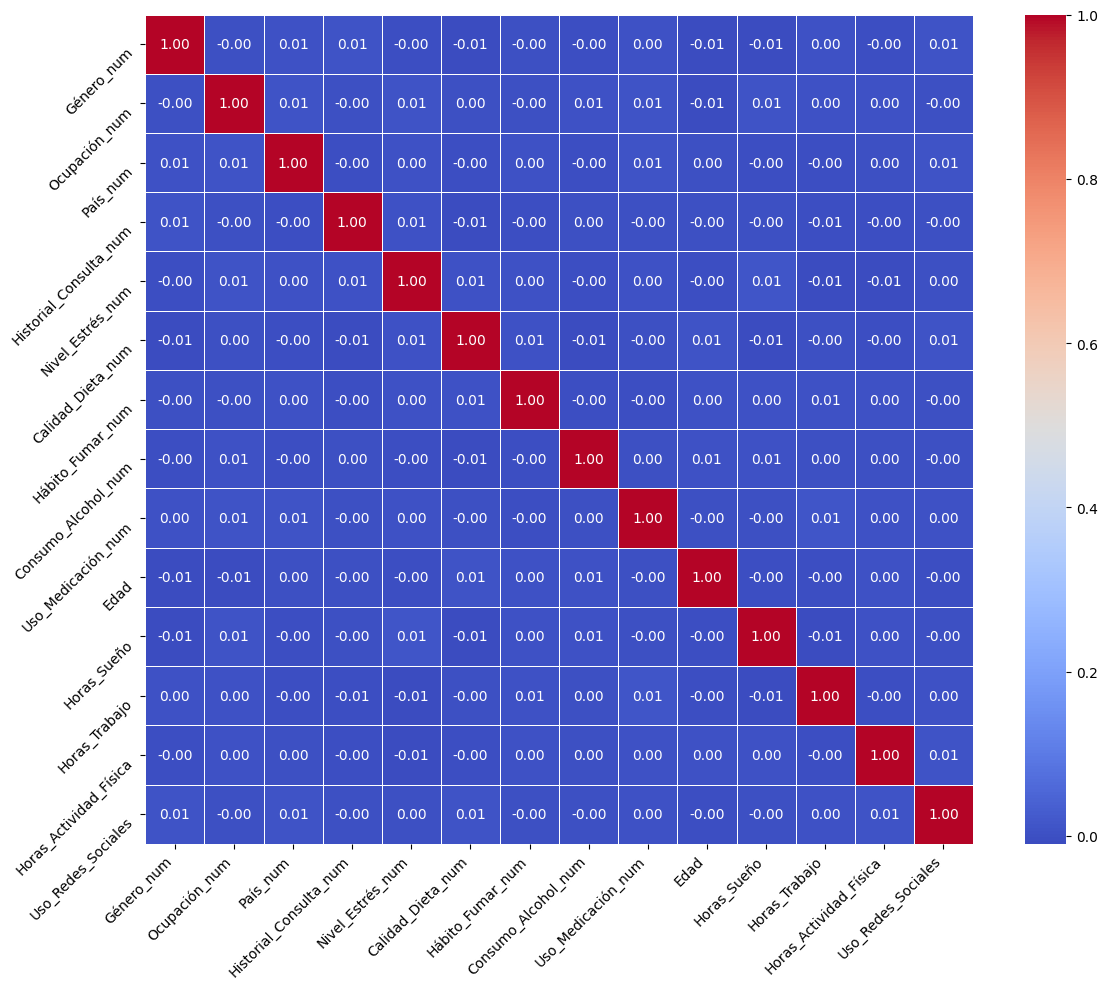

In [ ]:
#ANALISIS VARIABLE MULTIVARIANTE
#Análisis númerico - categorico
#¿TIENE SENTIDO CONVERTIR GENERO, OCUPACION y PAIS A NUMERICA? (¿no afectaria?)

# Convertir las columnas categóricas a numéricas
df['Género_num'] = pd.factorize(df['Género'])[0]
df['Ocupación_num'] = pd.factorize(df['Ocupación'])[0]
df['País_num'] = pd.factorize(df['País'])[0]
df['Historial_Consulta_num'] = pd.factorize(df['Historial_Consulta'])[0]

# Variables ordinales
orden_estres = ['Low', 'Medium', 'High']
df['Nivel_Estrés_num'] = pd.Categorical(df['Nivel_Estrés'], categories=orden_estres, ordered=True).codes

orden_dieta = ['Unhealthy', 'Average', 'Healthy']
df['Calidad_Dieta_num'] = pd.Categorical(df['Calidad_Dieta'], categories=orden_dieta, ordered=True).codes

# Factorizar las demás columnas categóricas
df['Hábito_Fumar_num'] = pd.factorize(df['Hábito_Fumar'])[0]
df['Consumo_Alcohol_num'] = pd.factorize(df['Consumo_Alcohol'])[0]
df['Uso_Medicación_num'] = pd.factorize(df['Uso_Medicación'])[0] 

columnas_correlacion = [
    'Género_num', 'Ocupación_num', 'País_num', 'Historial_Consulta_num', 
    'Nivel_Estrés_num', 'Calidad_Dieta_num', 'Hábito_Fumar_num', 
    'Consumo_Alcohol_num', 'Uso_Medicación_num', 'Edad', 'Horas_Sueño', 
    'Horas_Trabajo', 'Horas_Actividad_Física', 'Uso_Redes_Sociales'
]

plt.figure(figsize=(12, 10))

sns.heatmap(df[columnas_correlacion].corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, va='top')

plt.tight_layout()
plt.show()

#salud mental no esta
#estandarizar o normalizar

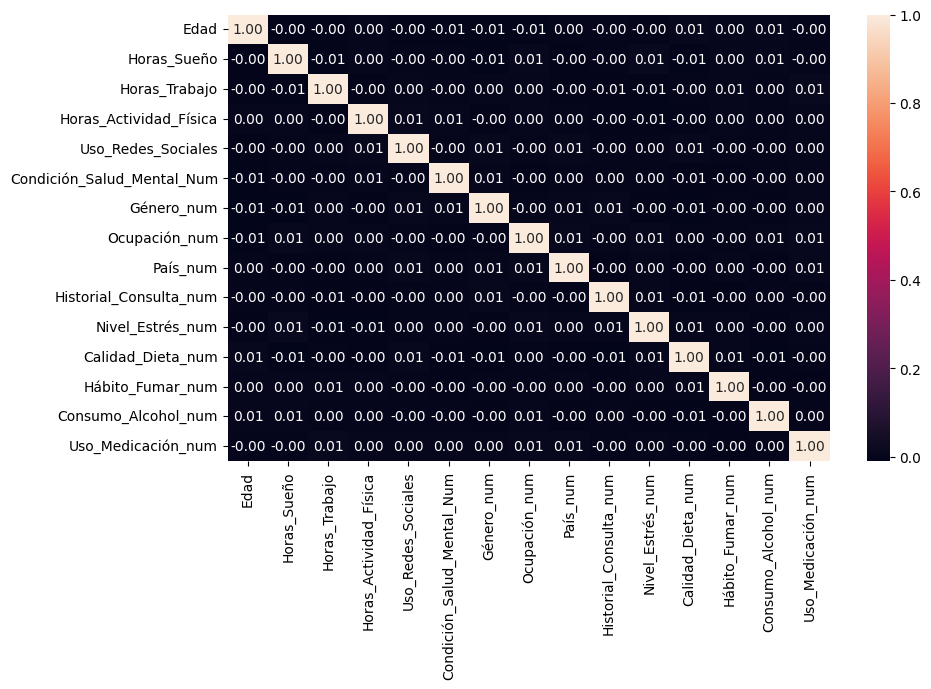

In [ ]:

fit, axis=plt.subplots(figsize=(10,7))

sns.heatmap(df._get_numeric_data().corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

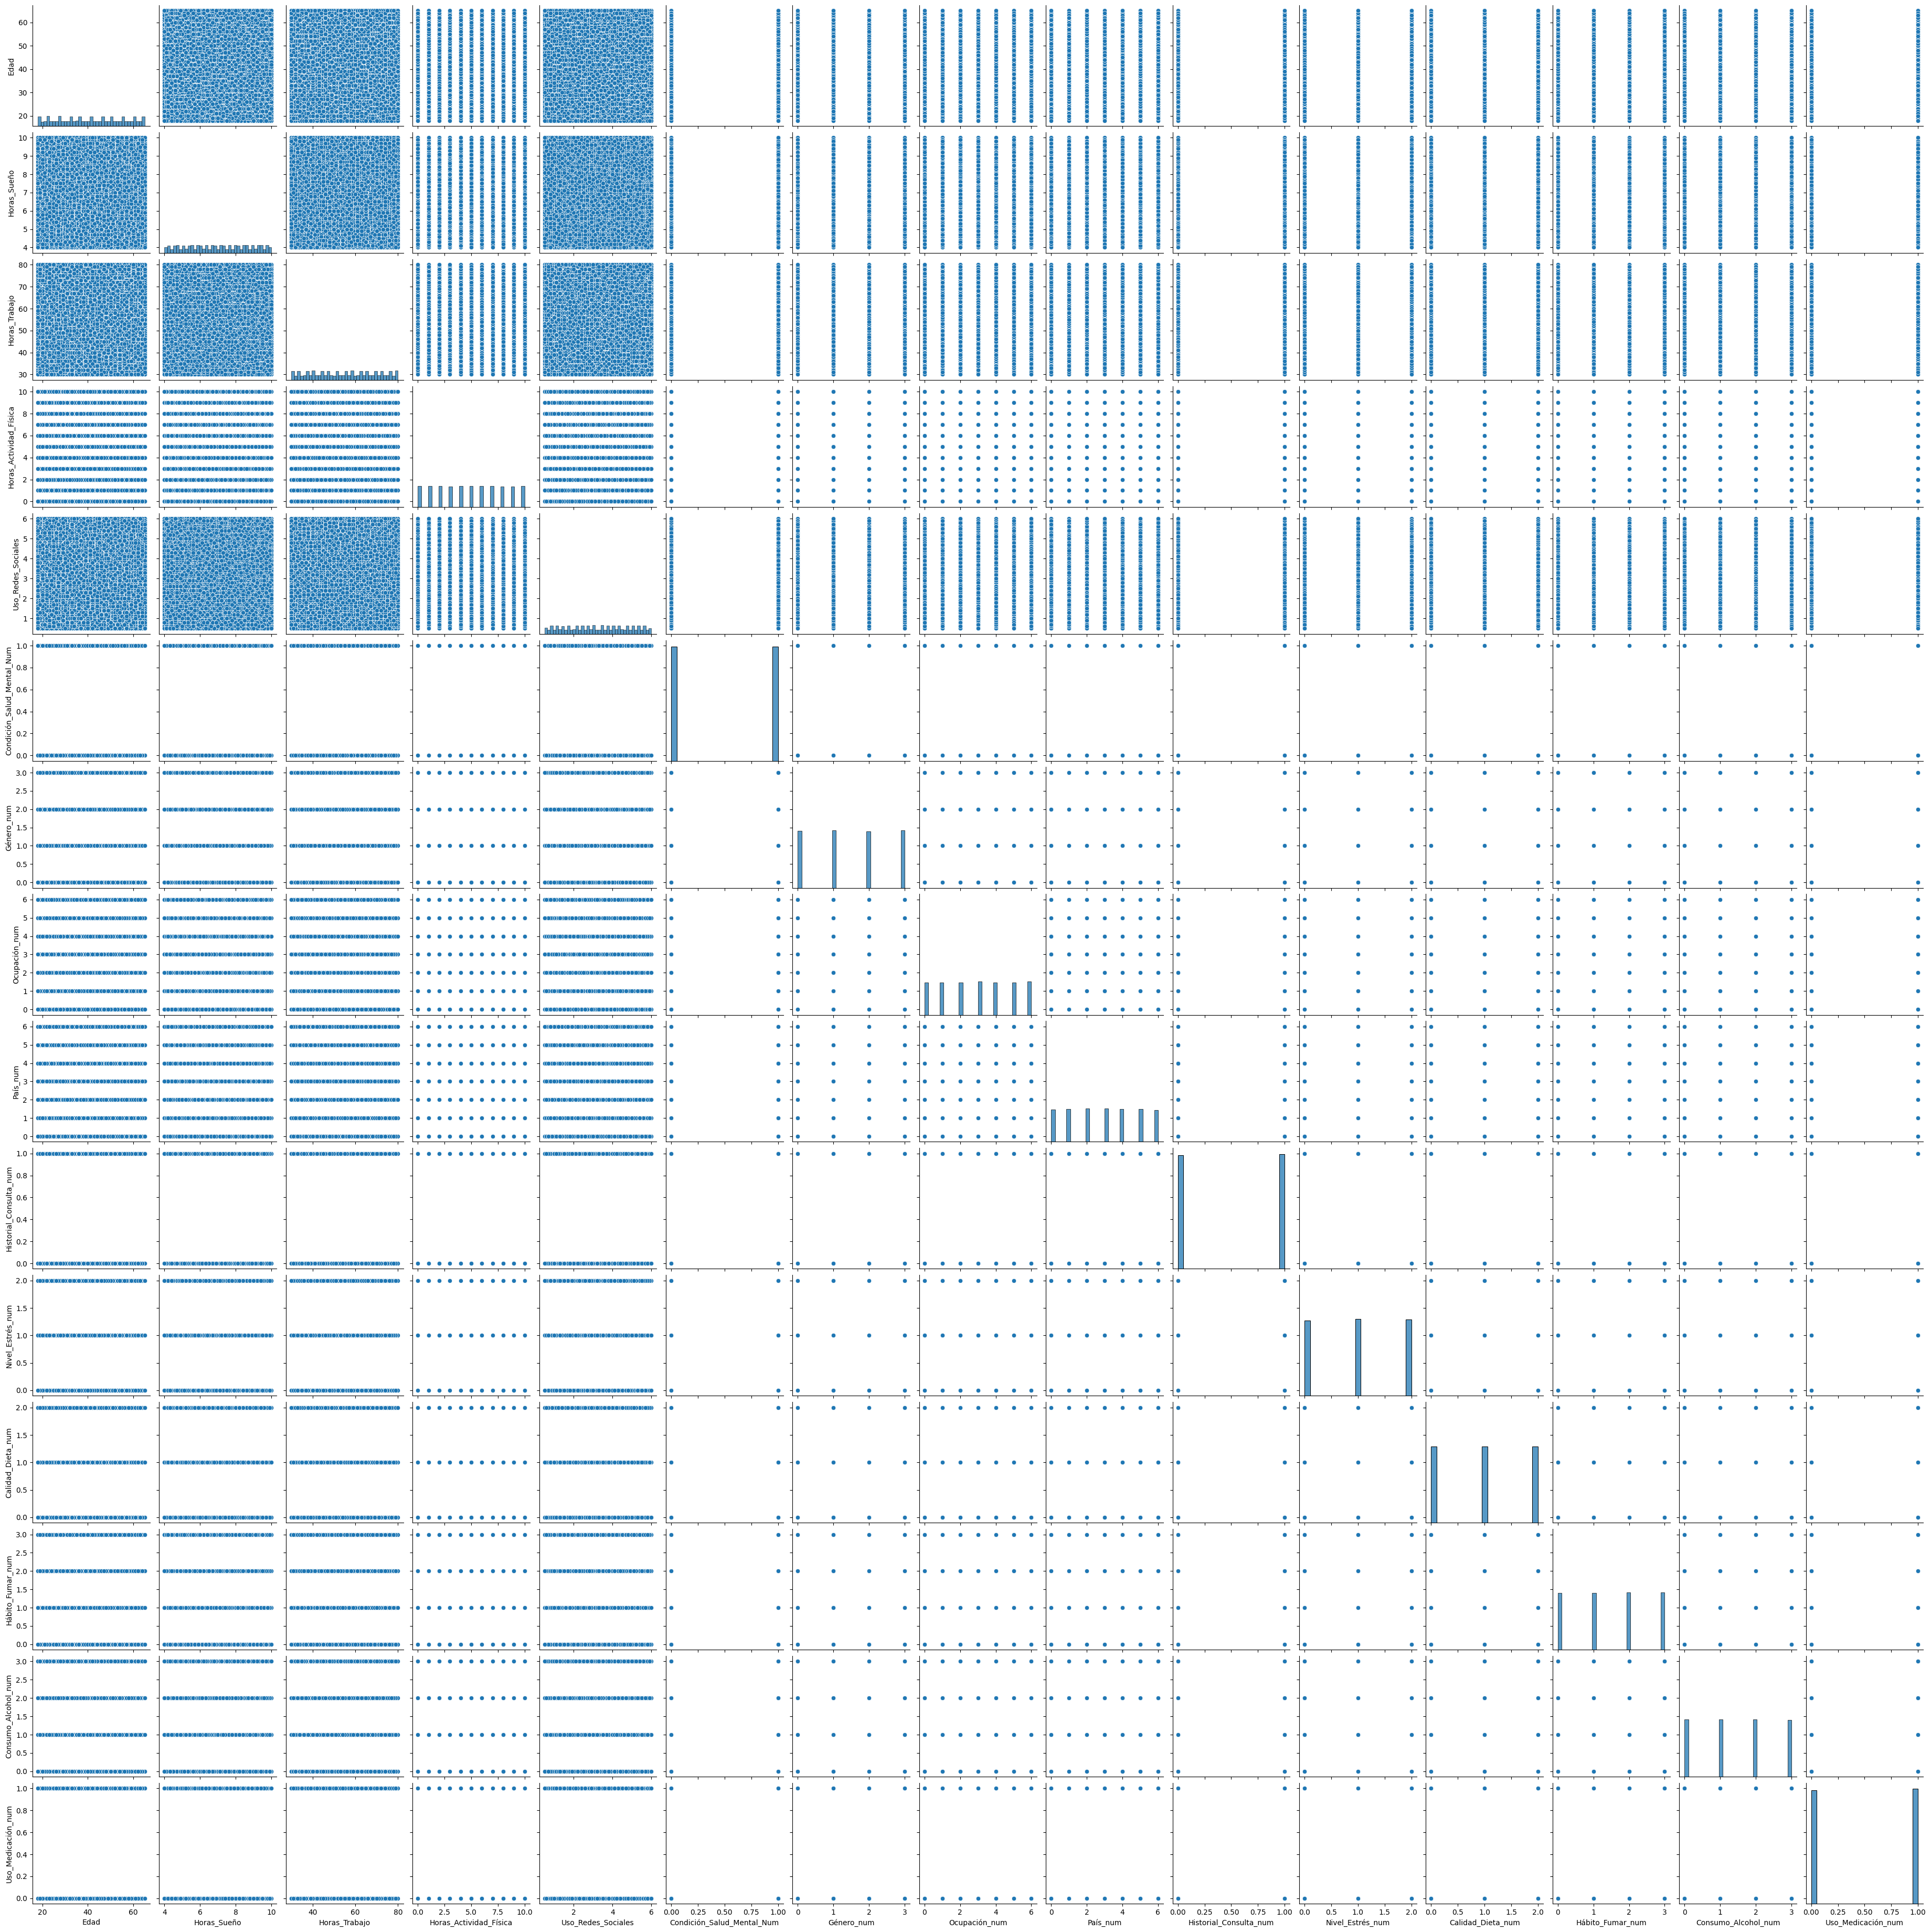

In [ ]:
sns.pairplot(data=df)
plt.show()

In [ ]:
#Ingeniería de características
df.describe()

,Edad,Horas_Sueño,Horas_Trabajo,Horas_Actividad_Física,Uso_Redes_Sociales,Condición_Salud_Mental_Num,Género_num,Ocupación_num,País_num,Historial_Consulta_num,Nivel_Estrés_num,Calidad_Dieta_num,Hábito_Fumar_num,Consumo_Alcohol_num,Uso_Medicación_num
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,41.473080,7.009934,55.062860,4.982040,3.243160,0.499940,1.502580,3.014420,2.994600,0.5022,1.005220,0.998180,1.505080,1.498480,0.503480
std,13.844185,1.732674,14.691575,3.161759,1.585235,0.500005,1.119937,2.001323,1.986789,0.5000,0.814276,0.816915,1.117926,1.118134,0.499993
min,18.000000,4.000000,30.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,5.500000,42.000000,2.000000,1.900000,0.000000,1.000000,1.000000,1.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,41.000000,7.000000,55.000000,5.000000,3.200000,0.000000,1.000000,3.000000,3.000000,1.0000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,53.000000,8.500000,68.000000,8.000000,4.600000,1.000000,3.000000,5.000000,5.000000,1.0000,2.000000,2.000000,3.000000,2.000000,1.000000
max,65.000000,10.000000,80.000000,10.000000,6.000000,1.000000,3.000000,6.000000,6.000000,1.0000,2.000000,2.000000,3.000000,3.000000,1.000000


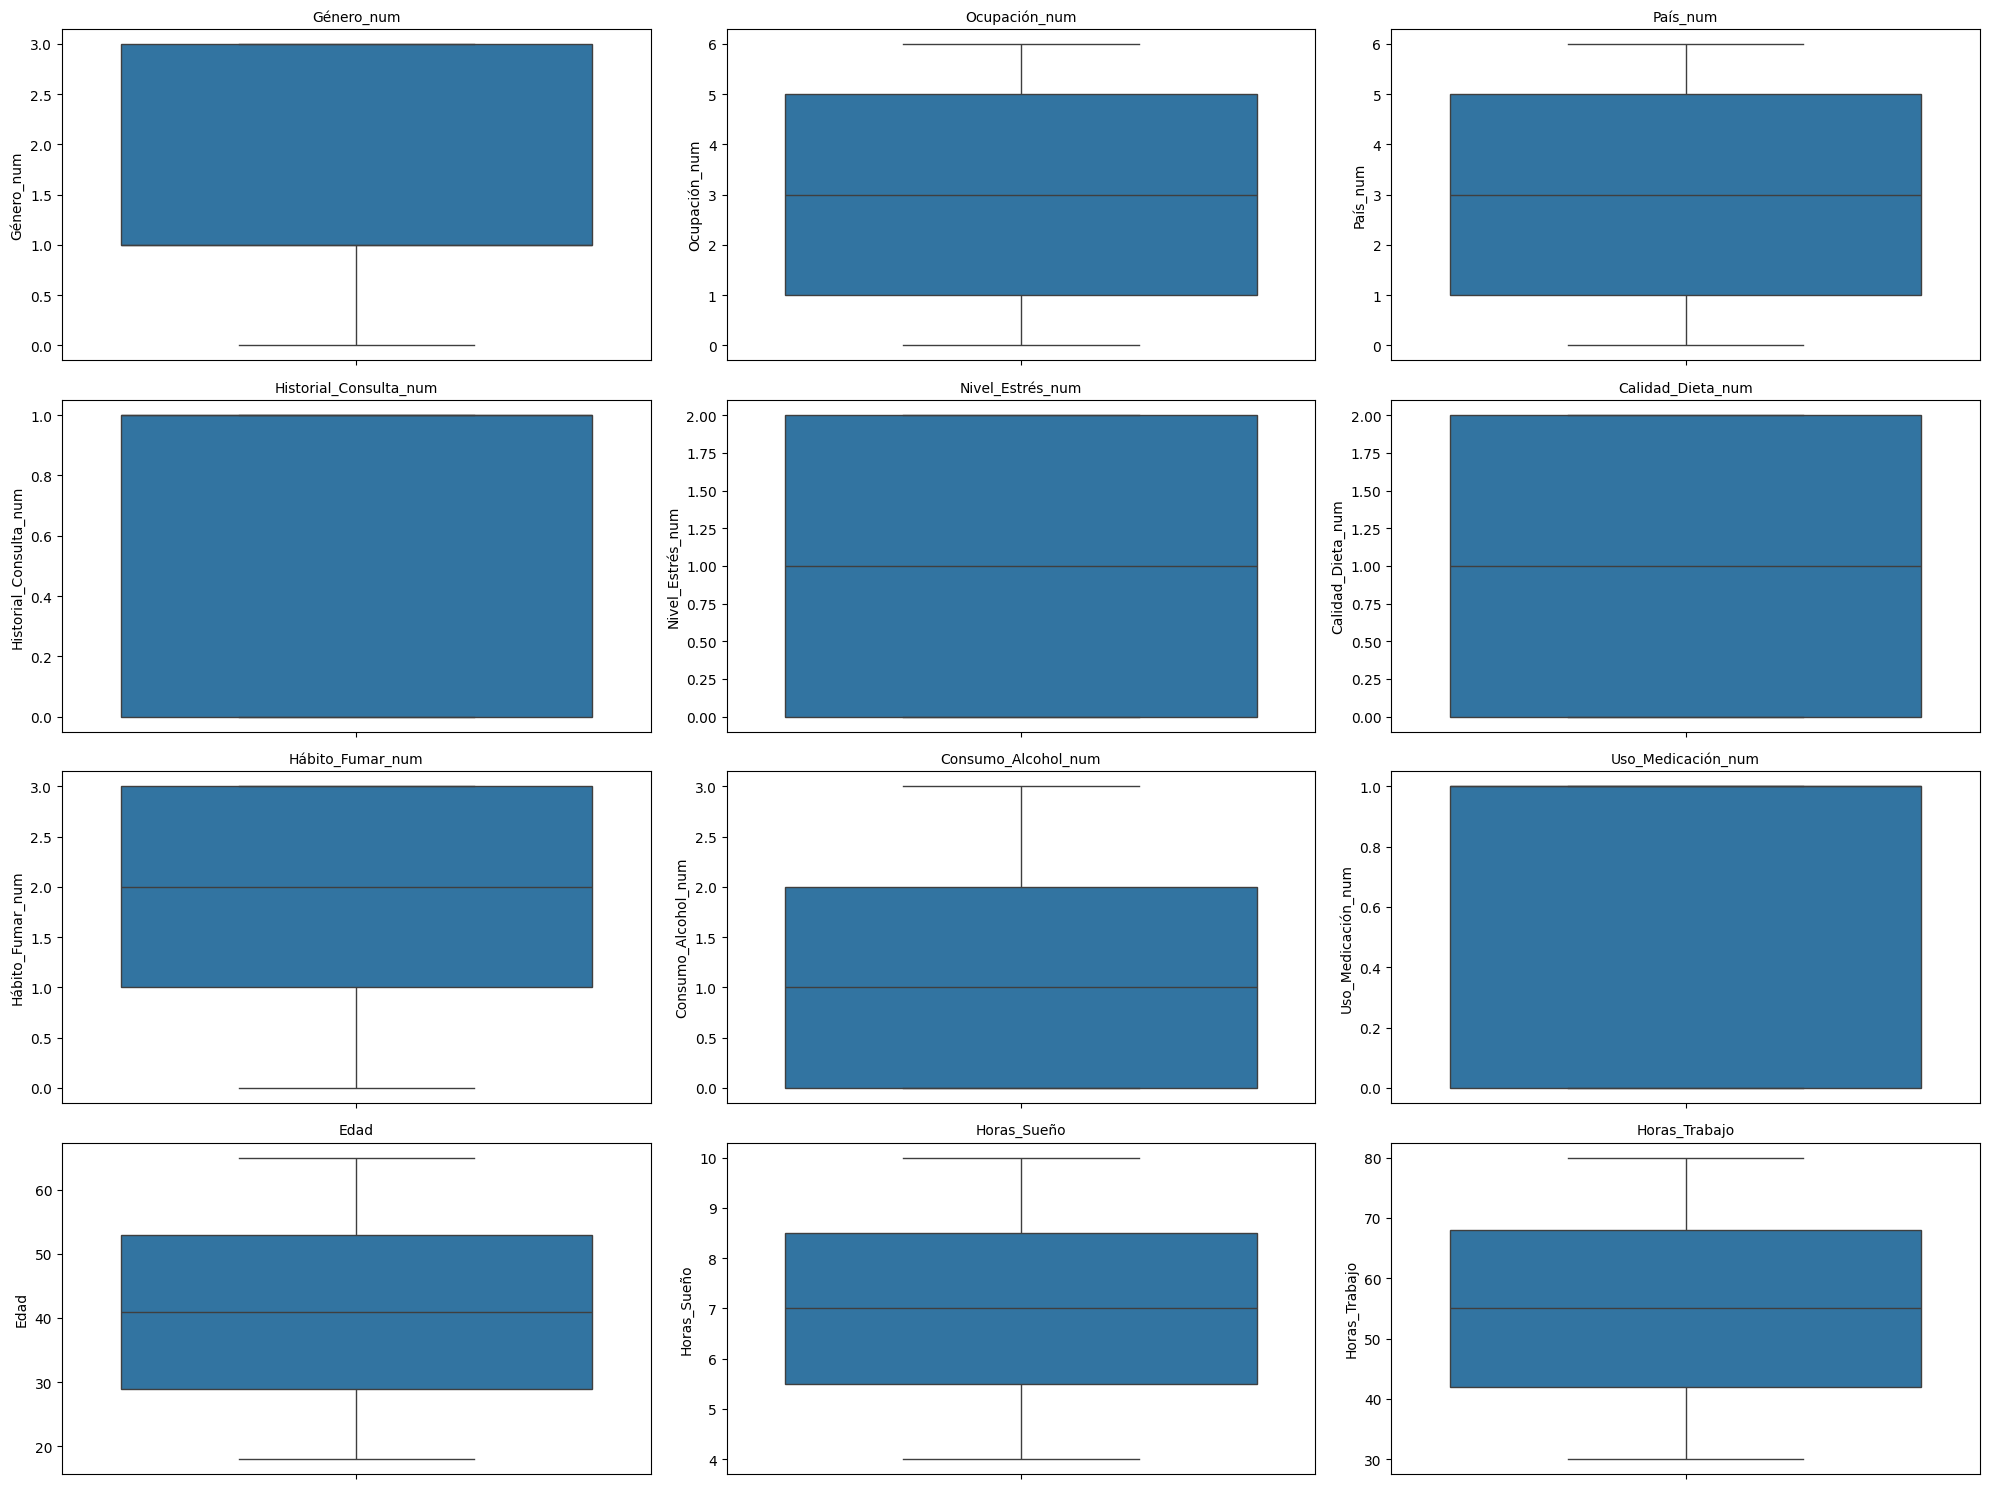

In [ ]:
#Boxplot general
columnas_correlacion = ['Género_num', 'Ocupación_num', 'País_num', 'Historial_Consulta_num', 'Nivel_Estrés_num', 'Calidad_Dieta_num', 'Hábito_Fumar_num', 'Consumo_Alcohol_num', 'Uso_Medicación_num', 'Edad', 'Horas_Sueño', 'Horas_Trabajo', 'Horas_Actividad_Física', 'Uso_Redes_Sociales']

fig, axis = plt.subplots(4, 3, figsize=(20, 15)) 
contador = 0

for columna in columnas_correlacion:
    if contador < 12: 
        sns.boxplot(ax=axis[contador//3, contador%3], data=df, y=columna)
        axis[contador//3, contador%3].set_title(columna, fontsize=10)  
        axis[contador//3, contador%3].tick_params(axis='x', rotation=45, labelsize=8) 
    contador += 1


plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

num_variables = ['Género','Ocupación','País','Condición_Salud_Mental','Historial_Consulta','Nivel_Estrés','Calidad_Dieta','Hábito_Fumar','Consumo_Alcohol','Uso_Medicación', 'Nivel_Estrés_num', 'Calidad_Dieta_num', 'Hábito_Fumar_num', 'Consumo_Alcohol_num', 'Uso_Medicación_num', 'Edad', 'Horas_Sueño', 'Horas_Trabajo', 'Horas_Actividad_Física', 'Uso_Redes_Sociales']

for var in num_variables:
    if var not in df.columns:
        print(f"Error: La columna '{var}' no existe en el DataFrame.")
        exit() # Detiene la ejecución si falta una columna


X = df.drop('Condición_Salud_Mental', axis = 1)[num_variables]
y = df['Condición_Salud_Mental']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.head()) 


KeyError: "['Condición_Salud_Mental'] not in index"

ValueError: could not convert string to float: 'Male'

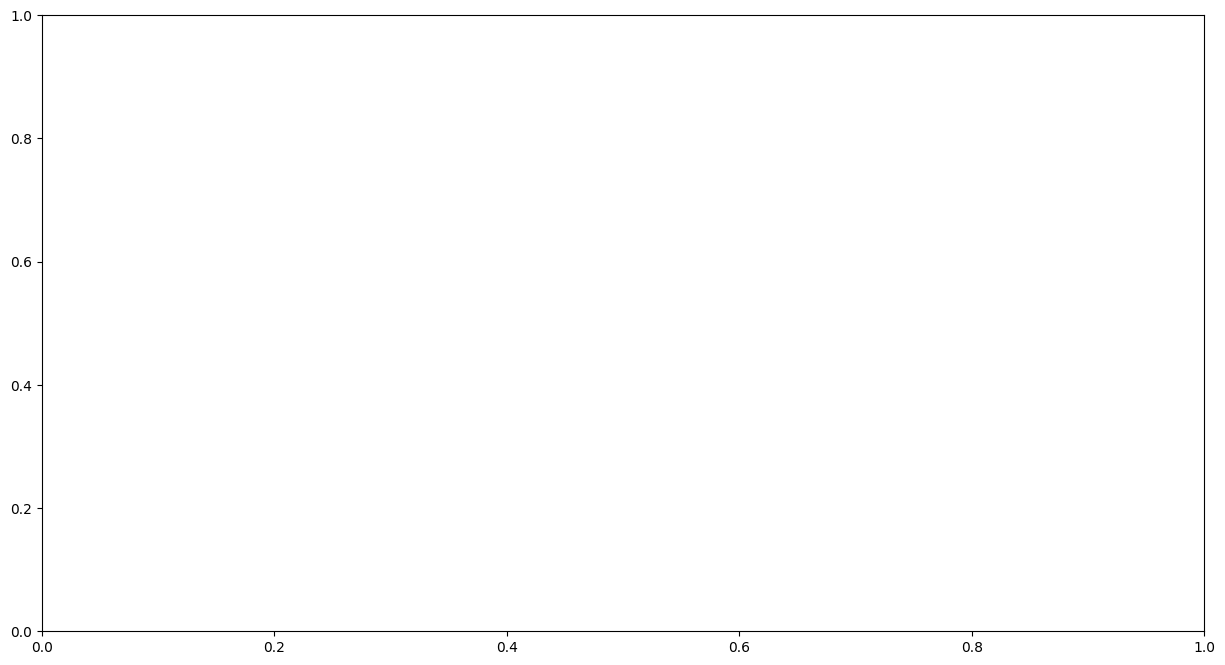

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 8)) 
pd.plotting.parallel_coordinates(
    df,
    "Condición_Salud_Mental",
    color=("#E58139", "#39E581", "#8139E5"),
    linewidth=0.5, 
    alpha=0.7, 
)

plt.xticks(rotation=45, ha="right") 
plt.tight_layout() 
plt.show()

In [ ]:
#EN RESUMEN APARENTEMENTE NO HAY RELACIONES LINEALES ENTRE LAS VARIABLES

In [ ]:
#CHAT GPT RECOMENDACION
#🤖 Entonces... ¿Qué hacer?
#Aquí tienes un plan claro para sacarle jugo al análisis a pesar de esas correlaciones bajitas:

#1. Haz un modelo de clasificación no lineal

#Ejemplo: Random Forest, Árbol de Decisión, o XGBoost
#👉 Para predecir la variable Condición_Salud_Mental.

#2. Revisa la importancia de las variables

#Los modelos tipo árbol te van a decir qué variables fueron útiles, incluso si Pearson decía que no servían.

#3. Crea combinaciones nuevas

#Ejemplo:

#Estrés x Horas de sueño
#Uso de redes x Calidad de dieta
#→ A veces 2 variables combinadas sí tienen fuerza.
#4. Haz clustering

#Para encontrar grupos con patrones similares, aunque no haya relaciones directas.